In [1]:
import pandas as pd
import numpy as np
import time
import datetime
from tqdm import tqdm
import random

import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns

In [2]:
data = pd.read_csv('bolha_flats_all_info1-49_14-03-2021_20-55-58.csv')

In [3]:
data= data.drop('Unnamed: 0', axis = 1)

In [4]:
data.head()

,Šifra oglasa,Objavljen,Do poteka še,Število prikazov oglasa,Cena,Vrsta cene,Posredovanje,Lokacija,Umeščenost stanovanja,Nadstropje,...,Neto površina,Leto izgradnje*,Leto zadnje prenove,Opremljenost in stanje,Energetski razred,Možnost menjave,Število parkirnih mest,Balkon / terasa / atrij,Zunanje površine in oprema,Interna številka oglasa
0,6523968,14.03.2021dne18:49,"\n29dni,22h,33min.\n",57-krat,\n\n192.000 €\n,Skupna cena,Prodam,"Savinjska, Celje, Slavko Šlander",V večstanovanjski stavbi,1.,...,"105,00 m²",2004.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,6523894,14.03.2021dne18:39,"\n29dni,22h,24min.\n",29-krat,\n\n134.500 €\n,Skupna cena,Prodam,"Osrednjeslovenska, Ljubljana Center, Center",V večstanovanjski stavbi,Pritličje,...,"29,30 m²",1908.0,2020.0,Popolnoma opremljeno,EI ni potrebna (334. člen EZ-1),Možna menjava za drugo nepremičnino,NaN,NaN,NaN,NaN
2,6523589,14.03.2021dne18:07,"\n29dni,21h,52min.\n",33-krat,\n\n29.500 €\n,Skupna cena,Prodam,"Gorenjska, Tržič, Tržič",V večstanovanjski stavbi,1.,...,"11,00 m²",1961.0,NaN,NaN,E (105 - 150 kWh/m2a),NaN,NaN,NaN,NaN,NaN
3,6523431,14.03.2021dne17:47,"\n29dni,21h,32min.\n",34-krat,\n\n120.000 €\n,Skupna cena,Prodam,"Savinjska, Slovenske Konjice, Slovenske Konjice",V večstanovanjski stavbi,1.,...,"70,00 m²",2020.0,NaN,Neopremljeno,A2 (10 - 15 kWh/m2a),NaN,7+,"Balkon, Loža",NaN,NaN
4,6523190,14.03.2021dne17:16,"\n29dni,21h,0min.\n",23-krat,\n\n180.000 €\n,Skupna cena,Prodam,"Osrednjeslovenska, Ljubljana Bežigrad, Bežigrad",V večstanovanjski stavbi,7.,...,NaN,1988.0,NaN,NaN,NaN,NaN,NaN,Zaprt balkon,NaN,NaN


In [6]:
data.columns

Index(['Šifra oglasa', 'Objavljen ', 'Do poteka še', 'Število prikazov oglasa',
       'Cena', 'Vrsta cene', 'Posredovanje', 'Lokacija',
       'Umeščenost stanovanja', 'Nadstropje',
       'Skupno število nadstropij v stavbi', 'Vrsta stanovanja',
       'Bivalna površina', 'Neto površina', 'Leto izgradnje*',
       'Leto zadnje prenove', 'Opremljenost in stanje', 'Energetski razred',
       'Možnost menjave', 'Število parkirnih mest', 'Balkon / terasa / atrij',
       'Zunanje površine in oprema', 'Interna številka oglasa'],
      dtype='object')

## Preprocessing 
Manipulating entries to derive numerical features from raw screaped values. 

In [21]:
# taking a look at the unique values of for columns (all but the first 5)
for column in data.columns[5:]:
    print(data[column].unique())

['\n\n192.000\xa0€\n' '\n\n134.500\xa0€\n' '\n\n29.500\xa0€\n'
 '\n\n120.000\xa0€\n' '\n\n180.000\xa0€\n' '\n\n69.900\xa0€\n'
 '\n\n75.000\xa0€\n' '\n\n50.000\xa0€\n' '\npodogovoru'
 '\n\n165.000\xa0€\n' '\n\n130.000\xa0€\n' '\n\n116.900\xa0€\n'
 '\n\n69.000\xa0€\n' '\n\n40.800\xa0€\n' '\n\n0\xa0€\n'
 '\n\n55.000\xa0€\n' '\n\n48.000\xa0€\n' '\n\n99.900\xa0€\n'
 '\n\n159.900\xa0€\n' '\n\n98.900\xa0€\n' '\n\n90.000\xa0€\n'
 '\n\n98.000\xa0€\n' '\n\n210.000\xa0€\n' '\n\n49.104\xa0€\n'
 '\n\n65.000\xa0€\n' '\n\n199.000\xa0€\n' '\n\n223.932,98\xa0€\n'
 '\n\n174.074,89\xa0€\n' '\n\n129.226,43\xa0€\n' '\n\n156.119,63\xa0€\n'
 '\n\n140.000\xa0€\n' '\n\n67.500\xa0€\n' '\n\n220.000\xa0€\n'
 '\n\n105.000\xa0€\n' '\n\n160.000\xa0€\n' '\n\n40.000\xa0€\n'
 '\n\n135.000\xa0€\n' '\n\n389.900\xa0€\n' '\n\n14.000\xa0€\n'
 '\n\n84.000\xa0€\n' '\n\n60.000\xa0€\n' '\n\n149.000\xa0€\n'
 '\n\n168.000\xa0€\n' '\n\n45.000\xa0€\n' '\n\n145.000\xa0€\n'
 '\n\n230.000\xa0€\n' '\n\n187.800\xa0€\n' '\n\n1.690\xa0€\n

In [59]:
# Objavljen > objavljen posted_date + posted_time...
def prepareFeatures (df): 
    a = {}
    main_df = pd.DataFrame()
    
    for i in tqdm(range(0,len(df))):
        a['AD_ID'] = df.iloc[i]['Šifra oglasa']

        a['posted_date'] = str(df.iloc[i]['Objavljen '].split('dne')[0])
        a['posted_time'] = str(df.iloc[i]['Objavljen '].split('dne')[1])

        a['shown'] = int(df.iloc[i]['Število prikazov oglasa'].split('-')[0])

        
        price = 0 if df.iloc[i]['Cena'] == '\npodogovoru' else int(df.iloc[i]['Cena'].split('\n')[2].split('\xa0')[0].replace('.','').split(',')[0])
        a['price'] = price
        a['currency'] = 'none' if df.iloc[i]['Cena'] == '\npodogovoru' else 'Euro'

        a['ptype'] = str('cumulative') if df.iloc[i]['Vrsta cene'] == 'Skupna cena' else 'perM2'

        a['l_region'] = str(df.iloc[i]['Lokacija'].split(',')[0].replace('š','s').replace('č','c').replace('ž','z').replace('Š','S').replace('Č','C').replace('Ž','Z'))
        a['l_2'] = str(df.iloc[i]['Lokacija'].split(',')[1].replace(' ', '').replace('š','s').replace('č','c').replace('ž','z').replace('Š','S').replace('Č','C').replace('Ž','Z'))
        a['l_3'] = str(df.iloc[i]['Lokacija'].split(',')[2].replace(' ', '').replace('š','s').replace('č','c').replace('ž','z').replace('Š','S').replace('Č','C').replace('Ž','Z'))

        a['sits_in'] = str(df.iloc[i]['Umeščenost stanovanja']).replace('š','s').replace('č','c').replace('ž','z').replace('Š','S').replace('Č','C').replace('Ž','Z')

        a['lvl'] = 0 if str(df.iloc[i]['Nadstropje']) == 'nan' else 'P' if df.iloc[i]['Nadstropje'] == 'Pritličje' else 'K' if df.iloc[i]['Nadstropje'] == 'Klet' else     'M' if df.iloc[i]['Nadstropje'] == 'Mansarda' else    'VP' if df.iloc[i]['Nadstropje'] == 'Visoko pritličje' else df.iloc[i]['Nadstropje'].split('.')[0] 

        a['t_lvl'] = 0 if str(df.iloc[i]['Skupno število nadstropij v stavbi']) == 'nan' else int(df.iloc[i]['Skupno število nadstropij v stavbi'])

        a['flat_type'] = df.iloc[i]['Vrsta stanovanja'].replace('š','s').replace('č','c').replace('ž','z').replace('Š','S').replace('Č','C').replace('Ž','Z') if str(df.iloc[i]['Vrsta stanovanja']) != 'nan' else 'none'
        
        size = 0 if str(df.iloc[i]['Bivalna površina']) == 'nan' else int(df.iloc[i]['Bivalna površina'].split(',')[0].replace('.',''))
        a['sizeM2'] = size if size < 5000 else size / 1000
        
        net_size = 0 if str(df.iloc[i]['Neto površina']) == 'nan' else int(df.iloc[i]['Neto površina'].split(',')[0].replace('.',''))
        a['net_sizeM2'] = net_size if net_size < 10000 else net_size / 1000
        
        a['price/sizeM2'] = price/size if int(size) != 0 else 0
        a['price/net_sizeM2']  = price/net_size if net_size != 0 else 0
        
        a['year_built'] = 0 if str(df.iloc[i]['Leto izgradnje*']) == 'nan' else df.iloc[i]['Leto izgradnje*']

        a['year_ren'] = 0 if str(df.iloc[i]['Leto zadnje prenove']) == 'nan' else df.iloc[i]['Leto zadnje prenove']

        a['condition'] = str(df.iloc[i]['Opremljenost in stanje']).replace('š','s').replace('č','c').replace('ž','z').replace('Š','S').replace('Č','C').replace('Ž','Z')

        a['en_eff'] = 'None' if str(df.iloc[i]['Energetski razred']) == 'nan'else df.iloc[i]['Energetski razred'].split(' ')[0] + df.iloc[i]['Energetski razred'].split(' ')[-1] if str(df.iloc[i]['Energetski razred'].split(' ')[-1]) == 'HR' else  df.iloc[i]['Energetski razred'].split(' ')[0]

        a['switch'] = 0 if str(df.iloc[i]['Možnost menjave']) == 'nan' else 1 if df.iloc[i]['Možnost menjave'] == 'Možna menjava za drugo nepremičnino' else 0 if df.iloc[i]['Možnost menjave'] == 'Menjava za drugo nepremičnino ni možna'  else np.nan

        a['park_spots'] =  0 if df.iloc[i]['Število parkirnih mest']  == 'brez pripadajočega parkirišča' else int(df.iloc[i]['Število parkirnih mest'].split('+')[0]) if str(df.iloc[i]['Število parkirnih mest']) != 'nan' else 0
       
        a['balcony'] = 1 if str(df.iloc[i]['Balkon / terasa / atrij']) != 'nan' else 0
        a['garden'] = 1 if str(df.iloc[i]['Zunanje površine in oprema']) != 'nan' else 0
        
        a_df = pd.DataFrame.from_dict([a])
        main_df = pd.concat([main_df,a_df],axis=0, ignore_index=True)
    return main_df

In [60]:
data_prep = prepareFeatures(data)
data_prep.head(5)

100%|█████████████████████████████████████████████████████████████████████████████| 1188/1188 [00:11<00:00, 100.75it/s]


,AD_ID,posted_date,posted_time,shown,price,currency,ptype,l_region,l_2,l_3,...,price/sizeM2,price/net_sizeM2,year_built,year_ren,condition,en_eff,switch,park_spots,balcony,garden
0,6523968,14.03.2021,18:49,57,192000,Euro,cumulative,Savinjska,Celje,SlavkoSlander,...,2232.558140,1828.571429,2004.0,0.0,nan,None,0,0,0,0
1,6523894,14.03.2021,18:39,29,134500,Euro,cumulative,Osrednjeslovenska,LjubljanaCenter,Center,...,4803.571429,4637.931034,1908.0,2020.0,Popolnoma opremljeno,EI,1,0,0,0
2,6523589,14.03.2021,18:07,33,29500,Euro,cumulative,Gorenjska,Trzic,Trzic,...,2681.818182,2681.818182,1961.0,0.0,nan,E,0,0,0,0
3,6523431,14.03.2021,17:47,34,120000,Euro,cumulative,Savinjska,SlovenskeKonjice,SlovenskeKonjice,...,0.000000,1714.285714,2020.0,0.0,Neopremljeno,A2,0,7,1,0
4,6523190,14.03.2021,17:16,23,180000,Euro,cumulative,Osrednjeslovenska,LjubljanaBezigrad,Bezigrad,...,3396.226415,0.000000,1988.0,0.0,nan,None,0,0,1,0


In [44]:
data_prep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1188 entries, 0 to 1187
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   AD_ID             1188 non-null   int64  
 1   posted_date       1188 non-null   object 
 2   posted_time       1188 non-null   object 
 3   shown             1188 non-null   int64  
 4   price             1188 non-null   int64  
 5   currency          1188 non-null   object 
 6   ptype             1188 non-null   object 
 7   l_region          1188 non-null   object 
 8   l_2               1188 non-null   object 
 9   l_3               1188 non-null   object 
 10  sits_in           1188 non-null   object 
 11  lvl               1188 non-null   object 
 12  t_lvl             1188 non-null   int64  
 13  flat_type         1188 non-null   object 
 14  sizeM2            1188 non-null   float64
 15  net_sizeM2        1188 non-null   int64  
 16  price/sizeM2      1188 non-null   float64


In [61]:
df_col_dtypes = {
    'AD_ID':  'int32',
    'posted_date': 'str',
    'posted_time': 'str',
'shown': 'int32',
'price': 'int64',
'currency': '|S80',
'ptype' : '|S',
'l_region': '|S',
'l_2': '|S',
'l_3': '|S',
'sits_in': '|S',
'lvl': '|S',
't_lvl': 'int32',
'flat_type': '|S',
'sizeM2': 'int32',
'net_sizeM2': 'int32',
'price/sizeM2': 'int32',
'price/net_sizeM2': 'int32',
'year_built': 'int32',
'year_ren': 'int32',
'condition': '|S',
'en_eff': '|S',
'switch': 'int32',
'park_spots': 'int32',
'balcony': 'int32',
'garden': 'int32',
    
}

In [46]:
data_prep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1188 entries, 0 to 1187
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   AD_ID             1188 non-null   int64  
 1   posted_date       1188 non-null   object 
 2   posted_time       1188 non-null   object 
 3   shown             1188 non-null   int64  
 4   price             1188 non-null   int64  
 5   currency          1188 non-null   object 
 6   ptype             1188 non-null   object 
 7   l_region          1188 non-null   object 
 8   l_2               1188 non-null   object 
 9   l_3               1188 non-null   object 
 10  sits_in           1188 non-null   object 
 11  lvl               1188 non-null   object 
 12  t_lvl             1188 non-null   int64  
 13  flat_type         1188 non-null   object 
 14  sizeM2            1188 non-null   float64
 15  net_sizeM2        1188 non-null   int64  
 16  price/sizeM2      1188 non-null   float64


In [62]:
def data_fix_types(df, colname_types = df_col_dtypes):
    fixed_df = df    
    
    for column in tqdm(df.columns):
        #print(column)
        typ =colname_types[column]
        fixed_df[column] = df[column].astype(typ)
        
    return fixed_df

In [63]:
data_tfix = data_fix_types(data_prep)


100%|████████████████████████████████████████████████████████████████████████████████| 26/26 [00:00<00:00, 1628.88it/s]


In [22]:
data_tfix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1188 entries, 0 to 1187
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   AD_ID             1188 non-null   int32 
 1   posted_date       1188 non-null   object
 2   posted_time       1188 non-null   object
 3   shown             1188 non-null   int32 
 4   price             1188 non-null   int64 
 5   currency          1188 non-null   |S80  
 6   ptype             1188 non-null   |S10  
 7   l_region          1188 non-null   |S25  
 8   l_2               1188 non-null   |S25  
 9   l_3               1188 non-null   |S25  
 10  sits_in           1188 non-null   |S24  
 11  lvl               1188 non-null   |S9   
 12  t_lvl             1188 non-null   int32 
 13  flat_type         1188 non-null   |S13  
 14  sizeM2            1188 non-null   int32 
 15  net_sizeM2        1188 non-null   int32 
 16  price/sizeM2      1188 non-null   int32 
 17  price/net_size

In [16]:
data_prep.head()
#data_tfix.head()

,AD_ID,posted_date,posted_time,shown,price,currency,ptype,l_region,l_2,l_3,...,price/sizeM2,price/net_sizeM2,year_built,year_ren,condition,en_eff,switch,park_spots,balcony,garden
0,6523968,14.03.2021,18:49,57,192000,b'Euro',b'cumulative',b'Savinjska',b'Celje',b'SlavkoSlander',...,2232,1828,2004,0,b'nan',b'None',0,0,0,0
1,6523894,14.03.2021,18:39,29,134500,b'Euro',b'cumulative',b'Osrednjeslovenska',b'LjubljanaCenter',b'Center',...,4803,4637,1908,2020,b'Popolnoma opremljeno',b'EI',1,0,0,0
2,6523589,14.03.2021,18:07,33,29500,b'Euro',b'cumulative',b'Gorenjska',b'Trzic',b'Trzic',...,2681,2681,1961,0,b'nan',b'E',0,0,0,0
3,6523431,14.03.2021,17:47,34,120000,b'Euro',b'cumulative',b'Savinjska',b'SlovenskeKonjice',b'SlovenskeKonjice',...,0,1714,2020,0,b'Neopremljeno',b'A2',0,7,1,0
4,6523190,14.03.2021,17:16,23,180000,b'Euro',b'cumulative',b'Osrednjeslovenska',b'LjubljanaBezigrad',b'Bezigrad',...,3396,0,1988,0,b'nan',b'None',0,0,1,0


In [24]:
#trying out some filtering:
data_prep_filtered1 = data_prep.loc[(data_prep['price']>50000) & (data_prep['price']<100000) & (data_prep['sizeM2']>80)]
data_prep_filtered1.head()

,AD_ID,posted_date,posted_time,shown,price,currency,ptype,l_region,l_2,l_3,...,price/sizeM2,price/net_sizeM2,year_built,year_ren,condition,en_eff,switch,park_spots,balcony,garden
17,3174984,14.03.2021,08:50,2045,99900,b'Euro',b'cumulative',b'Podravska',b'Maribor',b'Center',...,499,0,1945,2018,b'nan',b'None',0,0,0,0
19,1452932,14.03.2021,08:20,3332,98900,b'Euro',b'cumulative',b'Podravska',b'Maribor',b'Center',...,509,0,1919,0,b'nan',b'EI',0,0,0,0
20,6515431,14.03.2021,00:15,55,90000,b'Euro',b'cumulative',b'Savinjska',b'Celje',b'Celje',...,937,937,1700,2020,b'nan',b'None',0,0,0,0
59,6504189,12.03.2021,10:42,34,92177,b'Euro',b'cumulative',b'Pomurska',b'Apace',b'Apace',...,970,0,2021,0,b'nan',b'EI',0,0,1,0
93,6492171,11.03.2021,00:13,781,74270,b'Euro',b'cumulative',b'Podravska',b'Ptuj',b'Ptuj',...,558,558,1880,2010,b'Delno opremljeno',b'None',0,0,0,0


In [25]:
data_tfix.head()

,AD_ID,posted_date,posted_time,shown,price,currency,ptype,l_region,l_2,l_3,...,price/sizeM2,price/net_sizeM2,year_built,year_ren,condition,en_eff,switch,park_spots,balcony,garden
0,6523968,14.03.2021,18:49,57,192000,b'Euro',b'cumulative',b'Savinjska',b'Celje',b'SlavkoSlander',...,2232,1828,2004,0,b'nan',b'None',0,0,0,0
1,6523894,14.03.2021,18:39,29,134500,b'Euro',b'cumulative',b'Osrednjeslovenska',b'LjubljanaCenter',b'Center',...,4803,4637,1908,2020,b'Popolnoma opremljeno',b'EI',1,0,0,0
2,6523589,14.03.2021,18:07,33,29500,b'Euro',b'cumulative',b'Gorenjska',b'Trzic',b'Trzic',...,2681,2681,1961,0,b'nan',b'E',0,0,0,0
3,6523431,14.03.2021,17:47,34,120000,b'Euro',b'cumulative',b'Savinjska',b'SlovenskeKonjice',b'SlovenskeKonjice',...,0,1714,2020,0,b'Neopremljeno',b'A2',0,7,1,0
4,6523190,14.03.2021,17:16,23,180000,b'Euro',b'cumulative',b'Osrednjeslovenska',b'LjubljanaBezigrad',b'Bezigrad',...,3396,0,1988,0,b'nan',b'None',0,0,1,0


In [20]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import Normalizer
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor, BaggingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV, cross_val_score, StratifiedKFold, learning_curve, KFold

In [64]:
train, test = train_test_split(data_tfix, test_size=0.2)

In [65]:
print(train.info(),test.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 950 entries, 787 to 331
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   AD_ID             950 non-null    int32 
 1   posted_date       950 non-null    object
 2   posted_time       950 non-null    object
 3   shown             950 non-null    int32 
 4   price             950 non-null    int64 
 5   currency          950 non-null    |S80  
 6   ptype             950 non-null    |S10  
 7   l_region          950 non-null    |S25  
 8   l_2               950 non-null    |S25  
 9   l_3               950 non-null    |S25  
 10  sits_in           950 non-null    |S24  
 11  lvl               950 non-null    |S9   
 12  t_lvl             950 non-null    int32 
 13  flat_type         950 non-null    |S13  
 14  sizeM2            950 non-null    int32 
 15  net_sizeM2        950 non-null    int32 
 16  price/sizeM2      950 non-null    int32 
 17  price/net_size

In [66]:
def impute_cats(df):
    # Find the columns of object type along with their column index
    object_cols = list(df.select_dtypes(exclude=[np.number]).columns)
    object_cols_ind = []
    for col in object_cols:
        object_cols_ind.append(df.columns.get_loc(col))

    # Encode the categorical columns with numbers
    label_enc = LabelEncoder()
    encoders = {}
    
    
    for i in object_cols_ind:
        df.iloc[:,i] = label_enc.fit_transform(df.iloc[:,i])
        encoders[i] = label_enc
    return df

In [67]:
# Impute the missing values
train_imp = impute_cats(train)
test_imp = impute_cats(test)

C:\Users\Asus\anaconda3\lib\site-packages\pandas\core\indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


In [138]:
X_train = train_imp.drop('price', axis =1)
y_train = np.ravel(np.array(train_imp[['price']]))

In [139]:
X_test = test_imp.drop('price', axis =1)
y_test = np.ravel(np.array(test_imp[['price']]))

<AxesSubplot:>

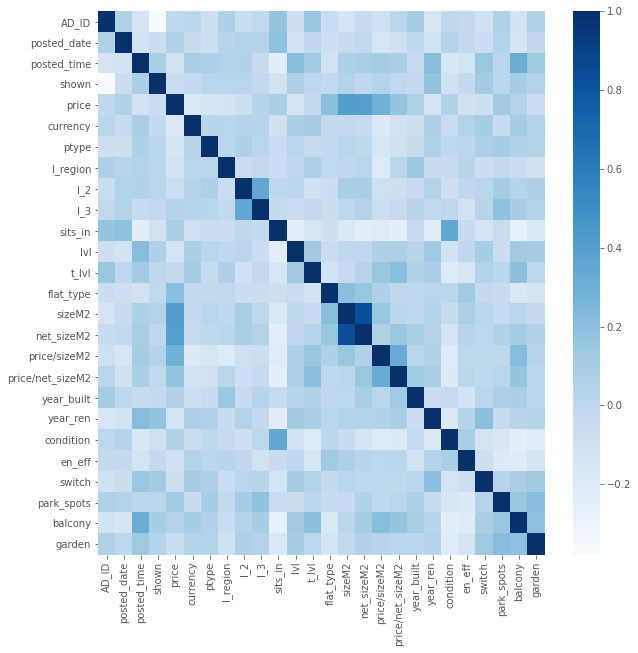

In [89]:
plt.figure(figsize =(10, 10))
data_corr = train.corr()
sns.heatmap(data_corr,cmap = 'Blues')

<AxesSubplot:xlabel='net_sizeM2', ylabel='price'>

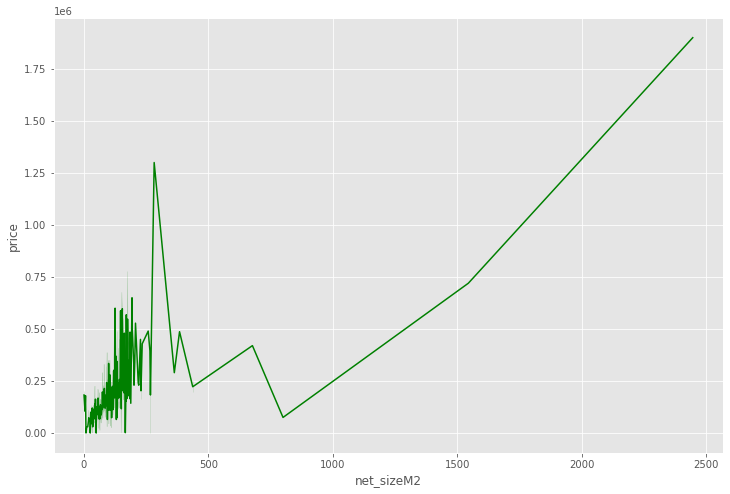

In [140]:
f, ax = plt.subplots(figsize=(12, 8))
sns.lineplot(x='net_sizeM2', y='price', color='green',data=train)


<AxesSubplot:xlabel='sizeM2', ylabel='price'>

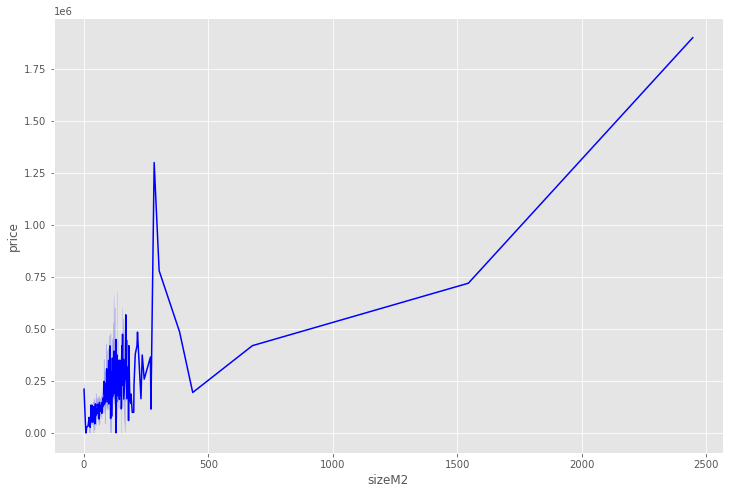

In [141]:
f, ax = plt.subplots(figsize=(12, 8))
sns.lineplot(x='sizeM2', y='price', color='blue',data=train)

<AxesSubplot:xlabel='year_built', ylabel='price'>

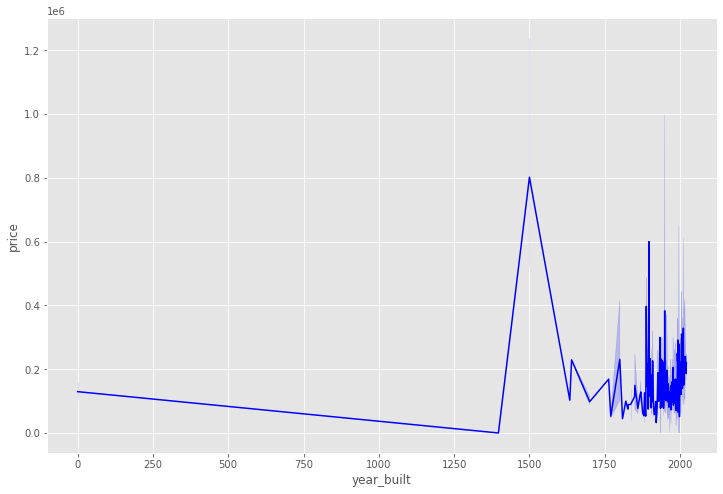

In [142]:
f, ax = plt.subplots(figsize=(12, 8))
sns.lineplot(x='year_built', y='price', color='blue',data=train)

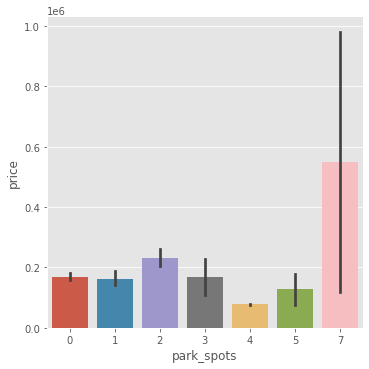

In [84]:
sns.catplot(x='park_spots', y='price', data=train, kind='bar')


In [92]:
from sklearn.metrics import confusion_matrix, mean_squared_error

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

Preparing for the modelling: 
    preparing the measurement metric

In [75]:
def rmse(y, y_pred):
    return np.sqrt(mean_squared_error(np.log(y), np.log(y_pred)))

## Random Forrest

In [143]:
rf_model = RandomForestRegressor(n_estimators=1000,
                                      max_depth=15,
                                      min_samples_split=5,
                                      min_samples_leaf=5,
                                      max_features=None,
                                      random_state=42,
                                      oob_score=True
                                     )
kf = KFold(n_splits=5)
y_pred = cross_val_score(rf_model, X_train, y_train, cv=kf, n_jobs=-1)
y_pred.mean()

0.6401037390931194

In [144]:
rf_model.fit(X_train, y_train)

RandomForestRegressor(max_depth=15, max_features=None, min_samples_leaf=5,
                      min_samples_split=5, n_estimators=1000, oob_score=True,
                      random_state=42)

In [145]:
y_train_pred_rf = rf_model.predict(X_train)


In [146]:
#for some reason returns an error - log = 0 or smth
rmse(y_train, y_train_pred)

<ipython-input-75-6f174cedb521>:2: RuntimeWarning: divide by zero encountered in log
  return np.sqrt(mean_squared_error(np.log(y), np.log(y_pred)))


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [148]:
y_test_pred_rf = rf_model.predict(X_test)

In [110]:
#rmse(y_test, y_test_pred)

## XGBoost


In [149]:
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

In [150]:
xgboost_model = XGBRegressor( learning_rate=0.01,
                         n_estimators=5000,
                         max_depth=4, min_child_weight=1,
                         gamma=0.6, subsample=0.7,
                         colsample_bytree=0.2,
                         nthread=-1,
                         scale_pos_weight=1, seed=27,
                         reg_alpha=0.00006
                       )

kf = KFold(n_splits=5)
y_pred = cross_val_score(xgboost_model, X_train, y_train, cv=kf, n_jobs=-1)
y_pred.mean()

0.6738823519347944

In [151]:
xgboost_model.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.2, gamma=0.6, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.01, max_delta_step=0, max_depth=4,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=5000, n_jobs=8, nthread=-1, num_parallel_tree=1,
             random_state=27, reg_alpha=6e-05, reg_lambda=1, scale_pos_weight=1,
             seed=27, subsample=0.7, tree_method='exact', validate_parameters=1,
             verbosity=None)

In [168]:
y_test.shape
y_test_pred_xgboost = xgboost_model.predict(X_test)

(238,)

## Gradient boost Regressor GBM

In [130]:
g_boost_model = GradientBoostingRegressor( n_estimators=6000, learning_rate=0.01,
                                     max_depth=5, max_features='sqrt',
                                     min_samples_leaf=15, min_samples_split=10,
                                     loss='ls', random_state =42
                                   )


kf = KFold(n_splits=5)
y_pred = cross_val_score(g_boost_model, X_train, y_train, cv=kf, n_jobs=-1)
y_pred.mean()

0.6435836698630111

In [131]:
g_boost_model.fit(X_train, y_train)

GradientBoostingRegressor(learning_rate=0.01, max_depth=5, max_features='sqrt',
                          min_samples_leaf=15, min_samples_split=10,
                          n_estimators=6000, random_state=42)

In [169]:
y_test_pred_g_boost = g_boost_model.predict(X_test)

## Light GBM

In [162]:
lightgbm_model = LGBMRegressor(objective='regression', 
                                       num_leaves=6,
                                       learning_rate=0.01, 
                                       n_estimators=6400,
                                       verbose=-1,
                                       bagging_fraction=0.80,
                                       bagging_freq=4, 
                                       bagging_seed=6,
                                       feature_fraction=0.2,
                                       feature_fraction_seed=7,
                                    )

kf = KFold(n_splits=5)
y_pred = cross_val_score(lightgbm_model, X_train, y_train, cv=kf)
print(y_pred.mean())

[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 

In [163]:
lightgbm_model.fit(X_train, y_train)

[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4


LGBMRegressor(bagging_fraction=0.8, bagging_freq=4, bagging_seed=6,
              feature_fraction=0.2, feature_fraction_seed=7, learning_rate=0.01,
              n_estimators=6400, num_leaves=6, objective='regression',
              verbose=-1)

In [171]:
y_test_pred_loghtgbm = lightgbm_model.predict(X_test)